In [1]:
%matplotlib inline

import os
import imp
import sympy as sp
from sympy.abc import x
import numpy as np
import pandas as pd
from numpy import pi
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

import stochastic_gradient_descent as linear_fit

report_dir = '../report'

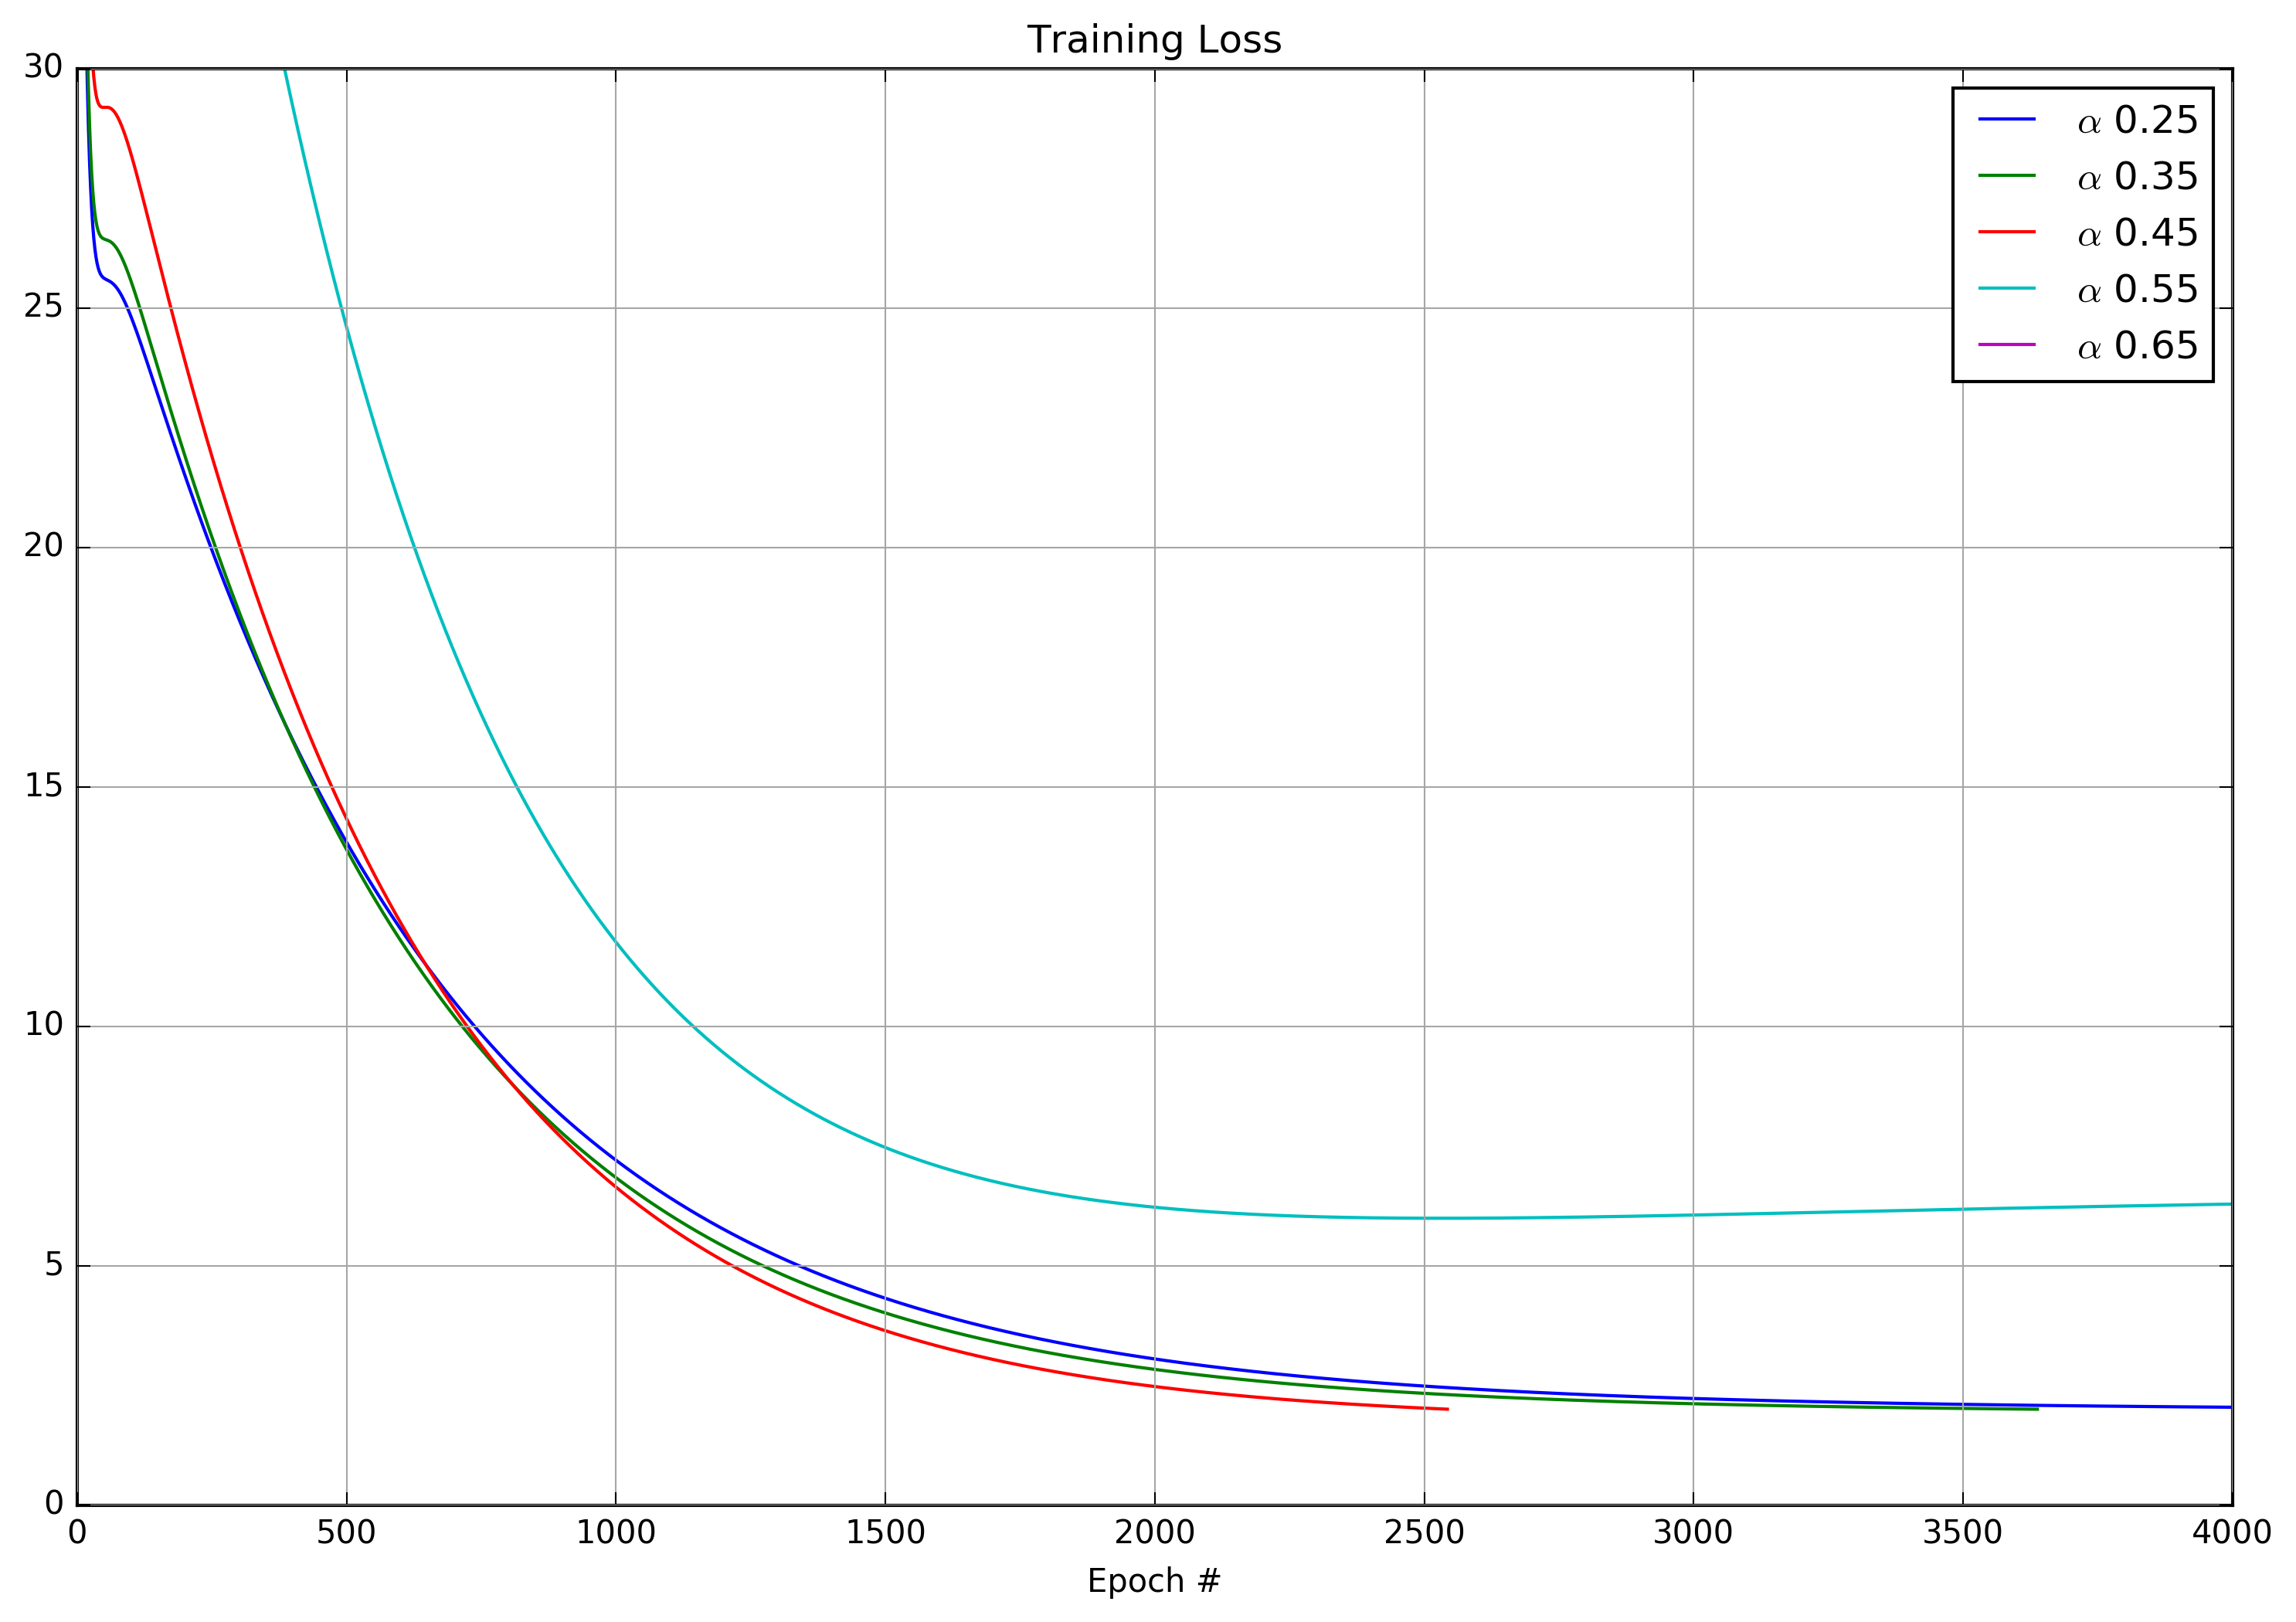

In [2]:
imp.reload(linear_fit)

deg = 3
m = 100
fig_path = os.path.join(report_dir, 'training_error.png')
X = np.linspace(0, 1, num=m) 
Y = map(lambda x: np.sin(2*pi*x), X) + np.random.normal(-0.1, 0.1 , m) 

poly_features = PolynomialFeatures(degree=deg, include_bias=True)
poly_X = poly_features.fit_transform(X.reshape(-1, 1))
fig, ax = plt.subplots(num=None, figsize=(12, 8), dpi=300, facecolor='w', edgecolor='k')
ax.grid(b=True, which='both', color='0.65',linestyle='-')

for alpha in [round(0.25 + i/10.0, 3) for i in range(0, 5)]:
    theta, errors = linear_fit.sgd(poly_X, Y, alpha=alpha, max_iter=5000)
    model_Y = map(lambda x: np.dot(x, theta), poly_X)

    ax.set_title('Training Loss')
    ax.set_xlabel('Epoch #')
    ax.plot(errors[:4000], label=r'$\alpha$ {0}'.format(alpha))

ax.set_ylim([0, 30])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels) 
plt.show()
fig.savefig(fig_path)

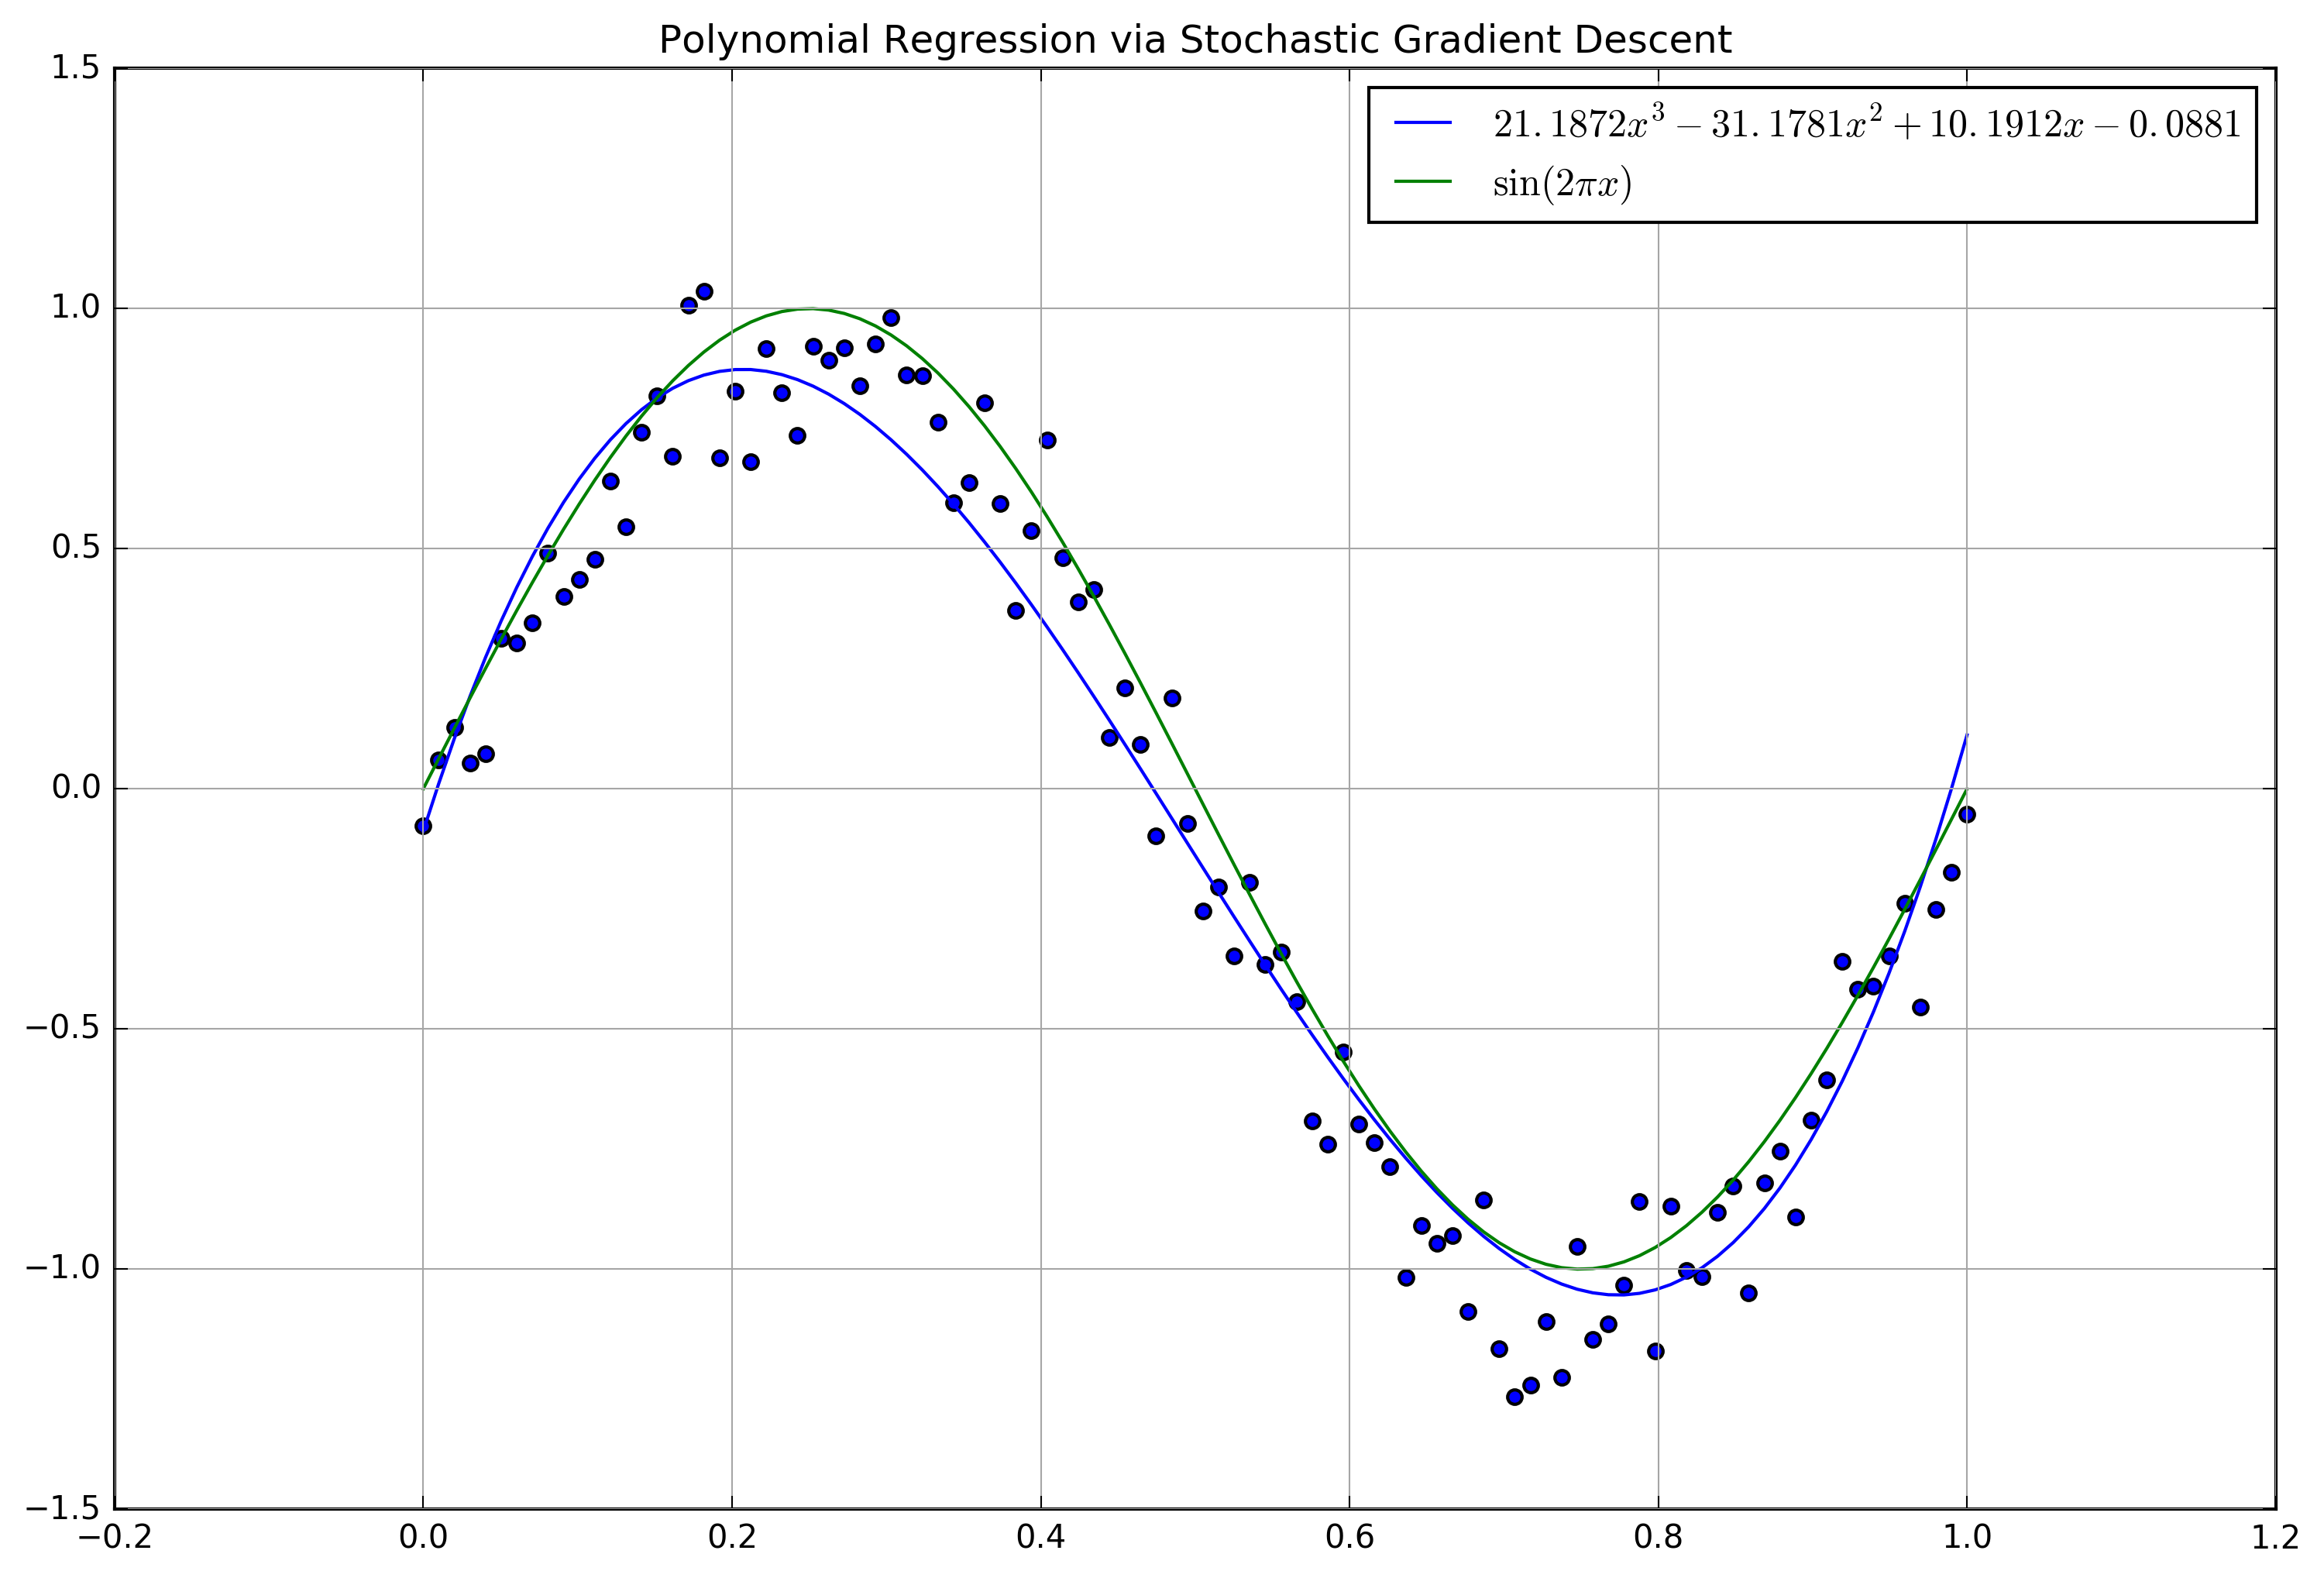

In [6]:
alpha = 0.45
fig_path = os.path.join(report_dir, 'fit.png')

theta, errors = linear_fit.sgd(poly_X, Y, alpha=alpha, epsilon=2, max_iter=5000)
model_Y = map(lambda x: np.dot(x, theta), poly_X)
sp.init_printing()
round_theta = [round(t, 4) for t in theta]
p = sp.latex(sp.Poly(reversed(round_theta),x).as_expr())

fig, ax = plt.subplots(num=None, figsize=(12, 8), dpi=300, facecolor='w', edgecolor='k')
ax.grid(b=True, which='both', color='0.65',linestyle='-')
data_scatter = ax.scatter(X, Y)
model_line = ax.plot(X, model_Y, label=r'${0}$'.format(p))
sin_line = ax.plot(X, map(lambda x: np.sin(2*pi*x), X), label=r'$\sin(2 \pi x)$')


ax.set_title('Polynomial Regression via Stochastic Gradient Descent')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()
fig.savefig(fig_path)